In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ImageProcessingPipeline import grayscale, binarize, gaussian, blur, laplacian, svd_compress

plt.rcParams['image.cmap'] = 'gray'

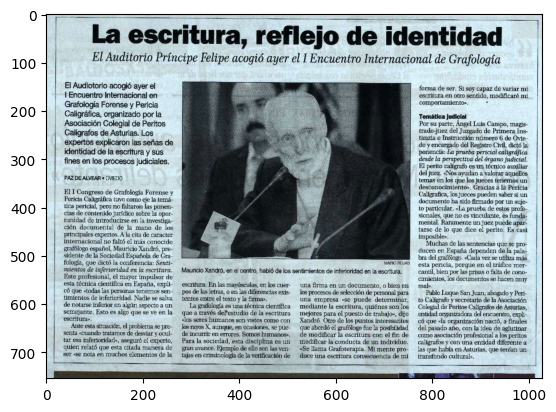

In [99]:
original_image = cv2.imread("../../data/images/diario2.png")
plt.imshow(original_image)

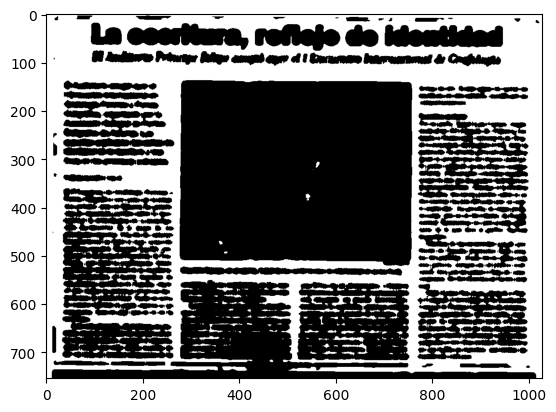

In [100]:
# Esto hace las mismas transformaciones que en el script original pero resumidas
# Para mas informacion, leer ImageProcessingPipeline.py jaajaj
image = original_image.copy()

pipeline = [
    grayscale(),
    blur((9, 9)),
    binarize(60),
]

for func in pipeline:
    image = func(image)

plt.imshow(image)

In [104]:
HORIZONTAL_WINDOW_SIZE = 5
VERTICAL_WINDOW_SIZE = 10
HORIZONTAL_SLIDE = 2
VERTICAL_SLIDE = 2

new_image = np.ones(image.shape, dtype="uint8")*255

In [105]:
for i in range(0, image.shape[0] - VERTICAL_WINDOW_SIZE + 1, VERTICAL_SLIDE):
    for j in range(0, image.shape[1] - HORIZONTAL_WINDOW_SIZE + 1, HORIZONTAL_SLIDE):
        mean = image[i:i+VERTICAL_WINDOW_SIZE, j:j+HORIZONTAL_WINDOW_SIZE].mean()
        if mean > 200:
            new_image[i:i+VERTICAL_WINDOW_SIZE, j:j+HORIZONTAL_WINDOW_SIZE] = 255
        else:
            new_image[i:i+VERTICAL_WINDOW_SIZE, j:j+HORIZONTAL_WINDOW_SIZE] = 0

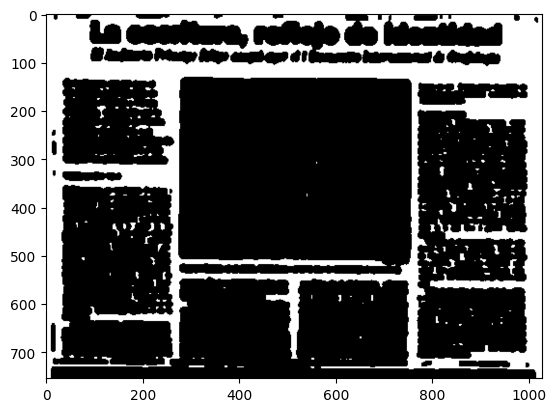

In [106]:
plt.imshow(new_image)